In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
#deletes highly correlated features from the dataset whose correlation is above 0.9

#new_dataset=correlation(df,0.9)
#new_dataset.shape


# Sort the correlation of feautures with TRR  to get the importance of each
#corr_mat=new_dataset.corr()
#cor=corr_mat['TRR']
#print(cor)
#sorted=cor.sort_values()
#print(sorted)
#imp_features=['']


In [4]:
df=pd.read_csv('G1.csv')
df1=pd.read_csv('G2.csv')

In [5]:
from sklearn.preprocessing import StandardScaler
from scipy import stats

# Separating out the features
numerical_df = df.drop(['TimeStamp', 'Identifier','F7', 'F13', 'F15', 'AssetGroup', 'F2', 'F3', 'F4', 'F12', 'F22', 'F23', 'F26', 'F27', 'F29', 'F30'], axis=1)
numerical_df1 = df1.drop(['TimeStamp', 'Identifier','F7', 'F13', 'F15', 'AssetGroup', 'F2', 'F3', 'F4', 'F12', 'F22', 'F23', 'F26', 'F27', 'F29', 'F30'], axis=1)
np.warnings.filterwarnings('ignore')
# numerical_df
#print(stats.zscore(numerical_df))
numerical_df = numerical_df[(np.abs(stats.zscore(numerical_df)) < 3).all(axis=1)]
#print(numerical_df.head(10))
numerical_df1=numerical_df1.dropna()
numerical_df1 = numerical_df1[(np.abs(stats.zscore(numerical_df1)) < 3).all(axis=1)]
#print(numerical_df1.head(10))
# Separating out the target
y = numerical_df.loc[:,['TRR']].values
y_new= numerical_df1.loc[:,['TRR']].values
# Separating out the Input
x = numerical_df.drop(['TRR'], axis=1).values
x_new=numerical_df1.drop(['TRR'],axis=1).values
#print(x_new)
# Standardizing the features
#print(x.shape)
#print(x_new.shape)
x = StandardScaler().fit_transform(x)
x_new=StandardScaler().fit_transform(x_new)

In [6]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10)

principalComponents = pca.fit_transform(x)
principalComponents_new=pca.fit_transform(x_new)
principalDf = pd.DataFrame(data = principalComponents)
principalDf_new=pd.DataFrame(data = principalComponents_new) 
#columns = ['PC-1', 'PC-2', 'PC-3', 'PC-4', 'PC-5'])
#print(principalDf.head(10))

TRR = pd.DataFrame(data=y)

 Multi Linear Regression using PCA :
mean squared error is : 1.2785470706516011
R^2 value is : 0.8687365122363407


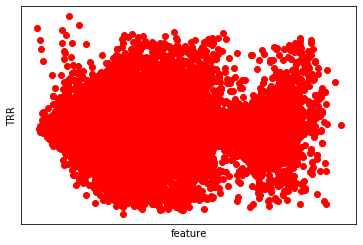

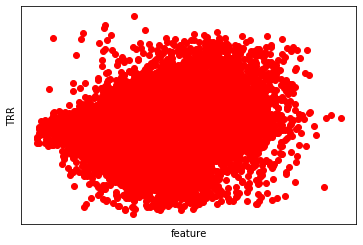

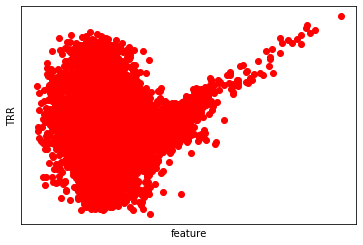

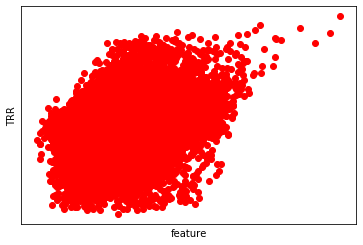

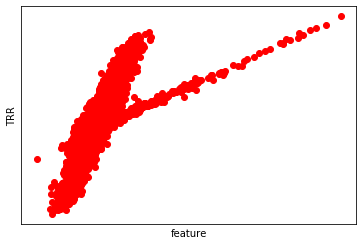

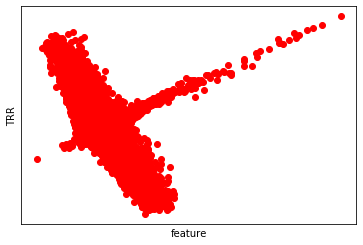

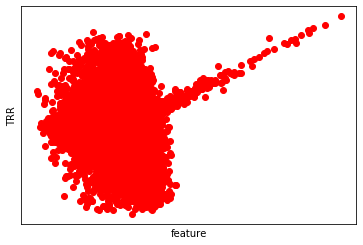

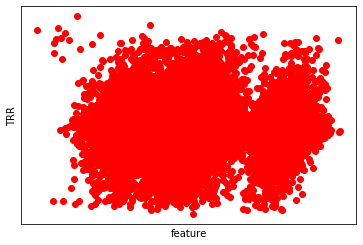

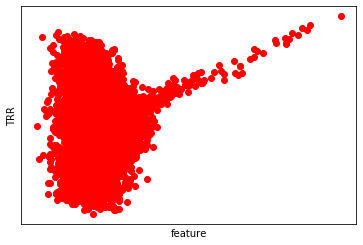

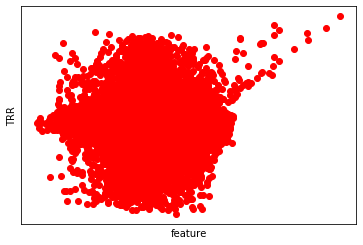

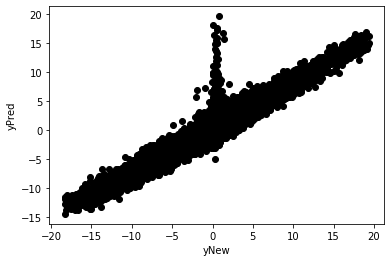

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
X = np.array(principalDf)
X_new = np.array(principalDf_new)
#X = PolynomialFeatures(2).fit_transform(X)
#X_new = PolynomialFeatures(2).fit_transform(X_new)
#X = np.concatenate((X,X_new),axis = 0)
#y = np.concatenate((y,y_new),axis = 0)
#print(y.dtype)
#xTrain, xTest, yTrain, yTest = train_test_split(X, y, test_size = 0.3, random_state = 42)

model = LinearRegression().fit(X, y)
#accuracy=model.score(X_new,y_new)
#accuracy_new= model.score(X_new,y_new)
#print("score is :" + str(accuracy))
#print(accuracy_new)
print(" Multi Linear Regression using PCA :")
#yPred_new = model.predict(X_new)
#print(yPred_new)
yPred = model.predict(X_new)
print("mean squared error is : " + str(mean_squared_error(y_new, yPred)))
print("R^2 value is : " + str(r2_score(y_new,yPred)))
#print(mean_squared_error(y_new, yPred_new))
#print(yTest.shape)
#print(xTest[:,[0]].shape)
#arr = yTest/yPred
#plt.scatter(xTest[:,[0]], yTest,color='black')
for i in range(10):
    plt.scatter(X_new[:,[i]],yPred,color='red')
    #plt.colorbar(label='0ratio')
    plt.xlabel('feature')
    plt.ylabel('TRR')
    plt.xticks(())
    plt.yticks(())
    plt.show()
plt.scatter(y_new, yPred, color='black')
plt.xlabel('yNew')
plt.ylabel('yPred')
plt.show()

In [8]:
import xgboost as xgb
#print(xgb.DMatrix)
xgdmat = xgb.DMatrix(X,y)
our_params = {'eta':0.1,'seed':0,'subsample':0.8,'colsample_bytree':0.8,'objective':'reg:squarederror','max_depth':3,'min_child_weight':1}
final_gb = xgb.train(our_params,xgdmat)
tesdmat = xgb.DMatrix(X_new)
y_pred = final_gb.predict(tesdmat)
#print(y_pred)
print("Mean sqaured error:" + str(mean_squared_error(y_new,y_pred)))
print("R^2 score :" + str(r2_score(y_new,y_pred)))

Mean sqaured error:4.20584645294687
R^2 score :0.5682019949950994
